# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


In [2]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(101)

beta_len = 50
n_samples = 100

beta = np.zeros(beta_len)
beta[[0,5,11,12,33,38,49]] = [1.5, -2.5, -3.0, 1.0, 2.5, 0.8, 1.2]
beta_0 = 5.0
# print(beta)

X = np.random.randn(n_samples, beta_len)
epsilon = np.random.normal(0,1,n_samples)
Y = beta_0 + X.dot(beta) + epsilon
# print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


In [3]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)
Y_pred = ridge_model.predict(X_test)
print("Predicted coefficients:\n", ridge_model.coef_)

Predicted coefficients:
 [ 1.28947451e+00 -1.43887692e-01 -7.66443685e-02 -6.97970256e-02
 -7.92960314e-04 -2.38460234e+00  2.03162119e-01  1.62085977e-01
  7.64376051e-02 -8.68021799e-02  4.02942268e-01 -2.88854218e+00
  1.04583152e+00 -1.53086463e-01 -1.71624089e-01 -3.15089533e-02
  3.27217144e-01 -6.61898289e-02  1.32553649e-01  1.82600349e-01
  2.18341539e-02  5.82595256e-02  2.77157449e-01  3.06605408e-01
  3.12751559e-01  8.49543860e-02 -1.87011700e-01 -2.07542235e-01
  1.70066285e-01  5.71084300e-02  5.91036566e-02  4.38620966e-03
 -4.44485322e-02  2.23436710e+00 -4.32782653e-04 -1.63026279e-01
 -7.18569031e-02  2.13296277e-02  3.70102231e-01 -3.79195702e-02
 -1.35915982e-01 -2.25727223e-01  9.82940716e-02  9.68042277e-02
 -4.62574602e-02 -1.44209831e-01  3.60784764e-02 -2.68789512e-01
  5.71733328e-02  1.36549726e+00]


In [ ]:
runs = 100
alphas = np.logspace(-2, 2, 20)
for_plot = []

for a in alphas:
    all_predictions = []
    all_mses = []
    
    for run in range(runs):
        new_epsilon = np.random.normal(0, 1, n_samples)
        Y_new = beta_0 + X.dot(beta) + new_epsilon   
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y_new, test_size=0.3, random_state=run)

        model = Ridge(alpha=a)
        model.fit(X_train, Y_train)
        preds = model.predict(X_test)
        all_predictions.append(preds)
        
        # Individual run MSE against true noiseless values
        true_Y_test = beta_0 + X_test.dot(beta)
        all_mses.append(np.mean((preds - true_Y_test)**2))

    all_predictions = np.array(all_predictions)
    true_Y_test = beta_0 + X_test.dot(beta)


    mean_prediction = np.mean(all_predictions, axis=0)
    bias_2 = np.mean((mean_prediction - true_Y_test)**2)
    var = np.mean(np.var(all_predictions, axis=0))
    mse = np.mean(all_mses)
    expected_mse = bias_2 + var
    
    labda = n_samples * a
    for_plot.append((labda, mean_prediction, bias_2, var, mse, expected_mse))
    
    print(f"alpha: {a}")
    print(f"Bias^2: {bias_2:.4f}")
    print(f"Variance: {var:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"Expected MSE (Bias^2 + Variance): {expected_mse:.4f}\n")

alpha: 0.01
Bias^2: 26.5887
Variance: 28.6850
MSE: 2.9502
Expected MSE (Bias^2 + Variance): 55.2737

alpha: 0.016237767391887217
Bias^2: 26.3423
Variance: 27.9572
MSE: 2.7038
Expected MSE (Bias^2 + Variance): 54.2995

alpha: 0.026366508987303583
Bias^2: 25.8734
Variance: 29.3998
MSE: 2.7702
Expected MSE (Bias^2 + Variance): 55.2732

alpha: 0.04281332398719394
Bias^2: 26.4575
Variance: 28.7076
MSE: 2.5655
Expected MSE (Bias^2 + Variance): 55.1651

alpha: 0.06951927961775606
Bias^2: 26.6026
Variance: 28.6826
MSE: 2.9361
Expected MSE (Bias^2 + Variance): 55.2852

alpha: 0.11288378916846889
Bias^2: 26.6106
Variance: 28.7361
MSE: 2.6775
Expected MSE (Bias^2 + Variance): 55.3467

alpha: 0.18329807108324356
Bias^2: 26.3787
Variance: 28.0179
MSE: 2.4955
Expected MSE (Bias^2 + Variance): 54.3966

alpha: 0.29763514416313175
Bias^2: 26.7356
Variance: 28.1069
MSE: 2.4984
Expected MSE (Bias^2 + Variance): 54.8425

alpha: 0.4832930238571752
Bias^2: 26.4819
Variance: 27.2289
MSE: 2.3947
Expected MSE 

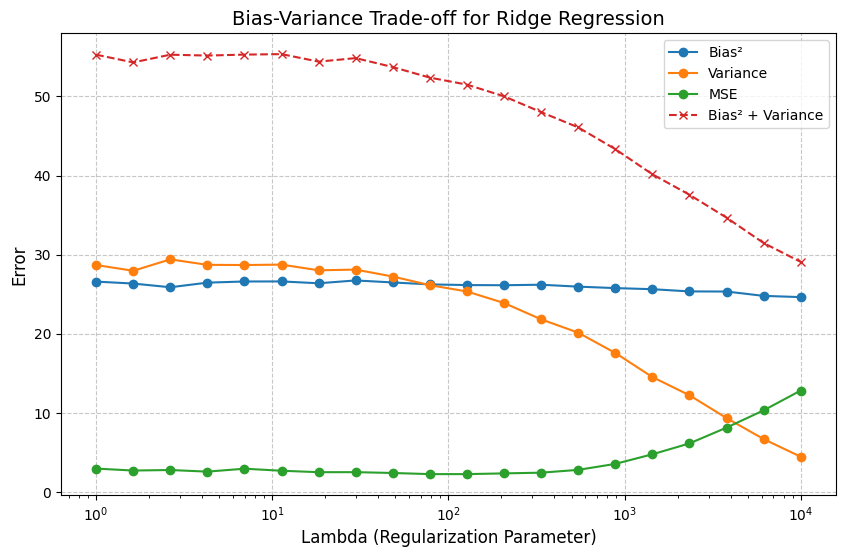

In [ ]:
labdas = [item[0] for item in for_plot]
bias_squared = [item[2] for item in for_plot]
variances = [item[3] for item in for_plot]
mses = [item[4] for item in for_plot]
expected_mses = [item[5] for item in for_plot]

plt.figure(figsize=(10, 6))
plt.plot(labdas, bias_squared, label='Bias²', marker='o')
plt.plot(labdas, variances, label='Variance', marker='o')
plt.plot(labdas, mses, label='MSE', marker='o')
plt.plot(labdas, expected_mses, label='Bias² + Variance', marker='x', linestyle='--')

plt.xscale('log')
plt.xlabel('Lambda (Regularization Parameter)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Bias-Variance Trade-off for Ridge Regression', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()